In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange

In [2]:
training_data = pd.read_csv('train_image.csv', header = None)
training_label = pd.read_csv('train_label.csv', header = None)
test_data = pd.read_csv('test_image.csv', header = None)
test_label = pd.read_csv('test_label.csv', header = None)

In [3]:
X = np.array(training_data)
y = np.array(training_label)
X_test = np.array(test_data)
y_test = np.array(test_label)

(60000, 784)
(60000, 1)


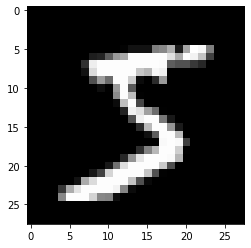

In [4]:
plt.imshow(X[0].reshape((28,28)), cmap='gray')
print(X.shape)
print(y.shape)

In [5]:
# X = (X/255)


In [6]:
def oneHotEncode(y):
    ans = []
    for i in range(len(y)):
        currentLabel = np.zeros(10)
        currentLabel[y[i]] = 1
        ans.append(currentLabel)
    return ans

In [7]:
y_train_encoded = oneHotEncode(y)
y_test_encoded = oneHotEncode(y_test)
print(np.array(y_train_encoded).shape, np.array(y_test_encoded).shape)

(60000, 10) (10000, 10)


In [8]:
# y_encoded = oneHotEncode(y)
# print(np.array(y_encoded).shape)

In [9]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))


def softmax(x):
    return np.exp(x - x.max()) / np.sum(np.exp(x - x.max()), axis = 0, keepdims = True)

def CalculateLoss(yHat, y):
#     yHat = yHat*y
    L_sum = np.sum(-1 * np.multiply(y, np.log(yHat + 1e-8)))
#     L_sum = np.sum(np.multiply(y, np.log(yHat)) + np.multiply((1 - y), np.log(1 - yHat)))
    m = y.shape[1]
    L = (1./m) * L_sum

    return L

In [10]:
def splitData(X, y, trainSize = 0.85):
    X_train = []
    y_train = []
    lenTrain = len(X) * trainSize
    X_copy = list(X)
    y_copy = list(y)
    while len(X_train) < lenTrain:
        ind = randrange(len(X_copy))
        X_train.append(X_copy.pop(ind))
        y_train.append(y_copy.pop(ind))
    return X_train, X_copy, y_train, y_copy

In [11]:
# X_train, X_test, y_train, y_test = splitData(X, y_encoded)

In [12]:
# """
#     Run this cell only once.
#     Else, it will transpose X multiple times and we won't get the desired results.
# """
# X_train = (np.array(X_train)).T
# y_train = (np.array(y_train)).T
# X_test = (np.array(X_test)).T
# y_test = (np.array(y_test)).T
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# print(np.random.permutation(X_train.shape[1]))

In [13]:
"""
    Run this cell only once.
    Else, it will transpose X multiple times and we won't get the desired results.
"""
X_train = (np.array(X)).T
y_train = (np.array(y_train_encoded)).T
X_test = (np.array(X_test)).T
y_test = (np.array(y_test_encoded)).T
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(np.random.permutation(X_train.shape[1]))

(784, 60000) (10, 60000) (784, 10000) (10, 10000)
[ 6366   977 42051 ... 40393 43884 23316]


In [14]:
nnL1 = 512
nnL2 = 256
numFeat = 784
classes = 10
weightsAndBiases = {
    'W1' : np.random.randn(nnL1, numFeat) * 0.01,
    'W2' : np.random.randn(nnL2, nnL1) * 0.01,
    'W3' : np.random.randn(classes, nnL2) * 0.01,
    'b1' : np.zeros(nnL1).reshape(nnL1,1),
    'b2' : np.zeros(nnL2).reshape(nnL2,1),
    'b3' : np.zeros(classes).reshape(classes,1)
}

In [15]:
def forwardProp(X):
#     print(weightsAndBiases)
    W1 = weightsAndBiases['W1']
    W2 = weightsAndBiases['W2']
    W3 = weightsAndBiases['W3']
    b1 = weightsAndBiases['b1']
    b2 = weightsAndBiases['b2']
    b3 = weightsAndBiases['b3']
#     print(W1.shape, X.shape, b1.shape)
    z1 = np.matmul(W1, X) + b1
    o1 = sigmoid(z1)
#     print(outputLayer1)

#     print(z1.shape)
    z2 = np.matmul(W2, o1) + b2
    o2 = sigmoid(z2)
    z3 = np.matmul(W3, o2) + b3
    o3 = softmax(z3)
    importantValuesForBackPropagation = []
    importantValuesForBackPropagation.append((z1, o1))
    importantValuesForBackPropagation.append((z2, o2))
    importantValuesForBackPropagation.append((z3, o3))
    
    return importantValuesForBackPropagation

In [16]:
def backProp(X, Y, z_a_values, batchSize):
    yHat = z_a_values[2][1]
    O2 = z_a_values[1][1]
    z2 = z_a_values[1][0]
    z1 = z_a_values[0][0]
    O1 = z_a_values[0][1]
#     loss = CrossEntropy(yHat, Y)
    """
    https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1
    dLossByZ3 = (dCost/dOut3) * (dOut3/dZ3)
    dLossBydW3 = dLossBydOutput * (dZ3/dW3)
    
    dLossBydOutput2 = dLossBydOutput * (dZ3/dOut2)
    dLossBydW2 = dLossBydOutput2 * (dOut2/dZ2) * (dZ2/dW2)  [dOut2/dZ2 = sigmoid(z2) * (1-sigmoid(z2))]
    
    
    """
    
    dZ3 = yHat - Y #+ (1-Y)/(1-yHat)
    
#     print(dLossBydOutput.shape)
#     print(outputLayer2.T.shape)
    
    dW3 = (1/batchSize) * np.matmul(dZ3, O2.T)
    db3 = (1/batchSize) * np.sum(dZ3, axis=1, keepdims=True)
    
    
    dO2 = np.dot(weightsAndBiases['W3'].T, dZ3)
    
    
#     print(dLossBydOutput2.shape, sigmoid(z2).shape)

    dZ2 = dO2 * sigmoid(z2) * (1-sigmoid(z2))
    
    dW2 = (1/batchSize) * np.matmul(dZ2, O1.T)
    db2 = (1/batchSize) * np.sum(dZ2, axis=1, keepdims=True)
        
#     print(dLossBydOutput2.shape, dO2BydZ2.shape)
#     dLossBydOutput1 = (dLossBydOutput2 * dO2BydZ2)

    dO1 = np.dot(weightsAndBiases['W2'].T, dZ2) 
    dZ1 = dO1 * sigmoid(z1) * (1-sigmoid(z1))

    
    dW1 = (1/batchSize) * np.matmul(dZ1, X.T)
    db1 = (1/batchSize) * np.sum(dZ1, axis=1, keepdims=True)
    
    weightDerivatives = [dW1, dW2, dW3]
    biasDerivatives = [db1, db2, db3]
    
    return weightDerivatives, biasDerivatives
    
    
    

In [17]:
def accuracyScore(x,y):
    yHat = forwardProp(x)
    yHat = yHat[2][1]
    yHat = yHat.argmax(axis=0)
    y = y.argmax(axis=0)
    c1 = (yHat==y)*1
    return np.mean(c1) * 100
    

In [18]:
def train(X_train, y_train, X_test, y_test, epochs, batchSize, learningRate):
    numImg = X_train.shape[1]
    print('num: ',numImg)
    for epoch in range(epochs):
        X_train = X_train
        Y_train = y_train
        batches = numImg//batchSize
        
        for batchNum in range(batches):
            startBatchFrom = batchNum * batchSize
            endBatchAt = min(startBatchFrom + batchSize, numImg - 1)
#             print(startBatchFrom, endBatchAt)
            currX = X_train[:, startBatchFrom: endBatchAt+1]
            currY = Y_train[:, startBatchFrom: endBatchAt+1] 
#             print(currY)

            outputForwardPropagation = forwardProp(currX)
#             print(outputForwardPropagation[2][1])
            weightD, biasD = backProp(currX, currY, outputForwardPropagation,batchSize) #endBatchAt - startBatchFrom)
            
            weightsAndBiases['W1'] = weightsAndBiases['W1'] - (learningRate * weightD[0])
            weightsAndBiases['W2'] = weightsAndBiases['W2'] - (learningRate * weightD[1])
            weightsAndBiases['W3'] = weightsAndBiases['W3'] - (learningRate * weightD[2])
            weightsAndBiases['b1'] = weightsAndBiases['b1'] - (learningRate * biasD[0])
            weightsAndBiases['b2'] = weightsAndBiases['b2'] - (learningRate * biasD[1])
            weightsAndBiases['b3'] = weightsAndBiases['b3'] - (learningRate * biasD[2])
#             print(weightsAndBiases['W1'])
        outputForwardPropagation = forwardProp(X_train)
#         print(outputForwardPropagation[2][1])
        lossCurrentEpochTrain = CalculateLoss(outputForwardPropagation[2][1], Y_train)
        
            
        outputForwardPropagationTest = forwardProp(X_test)
        lossCurrentEpochTest = CalculateLoss(outputForwardPropagationTest[2][1], y_test)
        print("Accuracy: ", accuracyScore(X_test, y_test))
        print("Epoch {}: training loss = {}, test loss = {}".format(
        epoch + 1, lossCurrentEpochTrain, lossCurrentEpochTest))
    return outputForwardPropagationTest
        

In [19]:
epochs = 60
batch_size = 16
learningRate = 0.0075
# print(y_train.shape)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
pred = train(X_train, y_train, X_test, y_test, epochs, batch_size, learningRate)

num:  60000
Accuracy:  88.09
Epoch 1: training loss = 0.4935299724093144, test loss = 0.4870150456995266
Accuracy:  91.5
Epoch 2: training loss = 0.3140011373768072, test loss = 0.3109807928756103
Accuracy:  92.80000000000001
Epoch 3: training loss = 0.25593457450249063, test loss = 0.2552233530834686


/var/folders/3v/9bkbypyn6mxc9jk17t5t72580000gn/T/ipykernel_14087/2284288791.py:2: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-x))


Accuracy:  93.73
Epoch 4: training loss = 0.22361327316379961, test loss = 0.2259443067786238
Accuracy:  93.96
Epoch 5: training loss = 0.20264170748035684, test loss = 0.21113363474409677
Accuracy:  94.71000000000001
Epoch 6: training loss = 0.18393241232619634, test loss = 0.18917139925579257
Accuracy:  94.78
Epoch 7: training loss = 0.17665358629519098, test loss = 0.18438180166309268
Accuracy:  94.78
Epoch 8: training loss = 0.17553363890890922, test loss = 0.18094319179463647
Accuracy:  95.05
Epoch 9: training loss = 0.16633768234317717, test loss = 0.17434102238549737
Accuracy:  94.93
Epoch 10: training loss = 0.16624390631861538, test loss = 0.17470143649913802
Accuracy:  94.89
Epoch 11: training loss = 0.16681027615591473, test loss = 0.1741823773344723
Accuracy:  94.98
Epoch 12: training loss = 0.16544936152689488, test loss = 0.17650935473028126
Accuracy:  95.39999999999999
Epoch 13: training loss = 0.1575754267971187, test loss = 0.16518710063047165
Accuracy:  95.07
Epoch 14

In [20]:
pred = pred[2][1]
print(pred)
pred = np.argmax(pred , axis= 0 )
df = pd.DataFrame(pred)
df.to_csv('test_predictions.csv', index = False, header = False)

[[1.01785222e-07 1.40134206e-05 1.20794943e-10 ... 2.63417287e-05
  3.05831590e-05 6.17176607e-04]
 [3.11021038e-06 8.14388047e-05 9.99787098e-01 ... 1.02806148e-06
  7.99493811e-04 4.17269582e-07]
 [3.07472452e-05 9.99361922e-01 4.17734658e-05 ... 7.64876869e-07
  4.50664556e-06 5.59015371e-04]
 ...
 [9.99849371e-01 2.43935096e-08 1.38309615e-04 ... 3.15213339e-04
  1.03173284e-05 4.44614892e-08]
 [5.23757444e-08 1.14856850e-04 9.70083445e-06 ... 7.53570647e-05
  5.45652087e-03 3.85311311e-05]
 [4.26576855e-06 2.95343784e-11 2.65586989e-08 ... 1.02167441e-02
  7.58900397e-06 1.02743215e-06]]
